In [1]:
import pandas
import matplotlib.pyplot
%matplotlib inline

In [2]:
#import the 'Exchange Traded Funds(ETFs) list'
etf_list = pandas.ExcelFile('ETF lists.xlsx')
etf_list

In [3]:
etf_list.sheet_names

[u'Sheet1']

In [4]:
etfs = etf_list.parse('Sheet1')

In [5]:
etfs.shape

(95, 5)

In [6]:
zcnh = pandas.read_csv('ZCNH.csv', index_col = 'Date', na_values = '0')
zgol = pandas.read_csv('ZGOL.csv', index_col = 'Date', na_values = '0')
zozi = pandas.read_csv('ZOZI.csv', index_col = 'Date', na_values = '0')
zusd = pandas.read_csv('ZUSD.csv', index_col = 'Date', na_values = '0')
zyau = pandas.read_csv('ZYAU.csv', index_col = 'Date', na_values = '0')
zyus = pandas.read_csv('ZYUS.csv', index_col = 'Date', na_values = '0')

In [7]:
zcnh.columns = ['Code','Opening','High','Low','Close','Volume']
zgol.columns = ['Code','Opening','High','Low','Close','Volume']
zozi.columns = ['Code','Opening','High','Low','Close','Volume']
zusd.columns = ['Code','Opening','High','Low','Close','Volume']
zyau.columns = ['Code','Opening','High','Low','Close','Volume']
zyus.columns = ['Code','Opening','High','Low','Close','Volume']

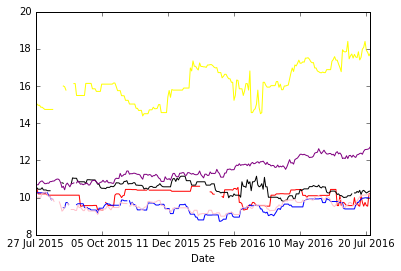

In [8]:
zcnh.Close.plot(c='red')
zgol.Close.plot(c='yellow')
zozi.Close.plot(c='blue')
zusd.Close.plot(c='black')
zyau.Close.plot(c='pink')
zyus.Close.plot(c='purple')

#problem: data missing

In [9]:
#fill the missing data
filled_zcnh = zcnh.fillna(method='pad')
filled_zgol = zgol.fillna(method='pad')
filled_zozi = zozi.fillna(method='pad')
filled_zusd = zusd.fillna(method='pad')
filled_zyau = zcnh.fillna(method='pad')
filled_zyus = zcnh.fillna(method='pad')

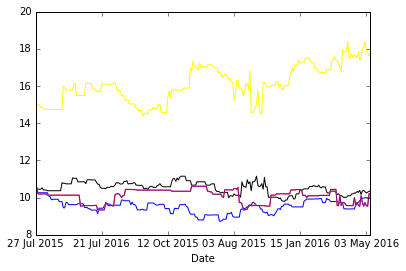

In [10]:
filled_zcnh.Close.plot(c='red')
filled_zgol.Close.plot(c='yellow')
filled_zozi.Close.plot(c='blue')
filled_zusd.Close.plot(c='black')
filled_zyau.Close.plot(c='pink')
filled_zyus.Close.plot(c='purple')

In [11]:
#clustering
testset = pandas.DataFrame({'zcnh_close':filled_zcnh.Close,'zgol_close':filled_zgol.Close})
testset

,zcnh_close,zgol_close
01 Apr 2016,10.13,16.04
01 Dec 2015,10.44,14.69
01 Feb 2016,10.20,15.78
01 Jul 2016,9.58,17.81
01 Jun 2016,9.57,16.71
01 Mar 2016,10.13,17.13
01 Oct 2015,10.34,15.85
01 Sep 2015,10.61,15.78
02 Dec 2015,10.12,14.69
02 Feb 2016,10.20,15.89


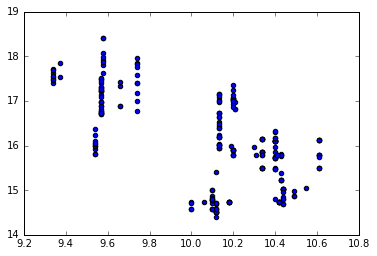

In [12]:
matplotlib.pyplot.scatter(testset.zcnh_close, testset.zgol_close)

In [13]:
import sklearn.cluster
kmean_cluster = sklearn.cluster.KMeans(init='k-means++',n_clusters=2)

In [14]:
two_clustering = kmean_cluster.fit_predict(testset)

In [15]:
import numpy
rainbow = numpy.array(['red', 'yellow', 'blue', 'black', 'pink', 'purple'])
rainbow[two_clustering]

array(['yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'yellow',
       'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red',
       'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'yellow', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow', 'red', 'red', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow', 'red', 'red', 'red', 'yellow',
       'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red',
       'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'red', 'red',
       'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow',
       'red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow',
       'yellow', 'red', 'yellow', 'red', 'red', 'red', 'yellow', 'yellow',
       'yellow', 'yellow', 'red', 'yellow', 'red', 'red', 'yellow',
      

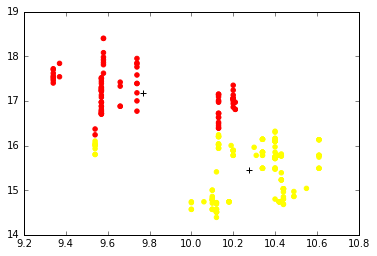

In [16]:
matplotlib.pyplot.scatter(testset.zcnh_close, testset.zgol_close, color = rainbow[two_clustering])

matplotlib.pyplot.scatter(kmean_cluster.cluster_centers_[:,0],
                          kmean_cluster.cluster_centers_[:,1], 
                          marker='+', s=30, color = 'black')

In [17]:
two_cluster_centers = kmean_cluster.cluster_centers_

In [18]:
print two_cluster_centers

[[  9.76831579  17.17126316]
 [ 10.27383648  15.4554717 ]]


In [19]:
cluster_centers = {}
cluster_membership = {}
for cluster_count in range(3,15):
    km = sklearn.cluster.KMeans(init='k-means++', n_clusters = cluster_count)
    cluster_membership[cluster_count] = km.fit_predict(testset)
    cluster_centers[cluster_count] = km.cluster_centers_

In [20]:
cluster_centers

{3: array([[ 10.26235849,  15.93264151],
        [  9.74418605,  17.24616279],
        [ 10.25354839,  14.78483871]]), 4: array([[  9.92690909,  16.862     ],
        [ 10.25354839,  14.78483871],
        [ 10.28680412,  15.88412371],
        [  9.55025   ,  17.5965    ]]), 5: array([[ 10.1654386 ,  16.09824561],
        [  9.55025   ,  17.5965    ],
        [ 10.24137931,  14.75413793],
        [ 10.406     ,  15.651     ],
        [  9.91408163,  16.91714286]]), 6: array([[ 10.25354839,  14.78483871],
        [  9.5416129 ,  17.69225806],
        [  9.54      ,  16.032     ],
        [ 10.35393258,  15.87696629],
        [  9.596     ,  16.989     ],
        [ 10.16375   ,  16.8915625 ]]), 7: array([[ 10.28270833,  16.11770833],
        [  9.5416129 ,  17.69225806],
        [ 10.24137931,  14.75413793],
        [ 10.17      ,  16.97407407],
        [  9.596     ,  16.989     ],
        [ 10.406     ,  15.651     ],
        [  9.54      ,  16.032     ]]), 8: array([[  9.54      ,  16.

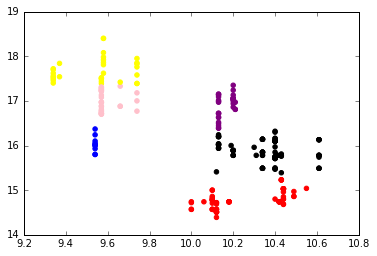

In [21]:
matplotlib.pyplot.scatter(testset.zcnh_close, testset.zgol_close, color=rainbow[cluster_membership[6]])

In [190]:
testset['colour'] = rainbow[cluster_membership[6]]
testset

,zcnh_close,zgol_close,colour
01 Apr 2016,10.13,16.04,yellow
01 Dec 2015,10.44,14.69,blue
01 Feb 2016,10.20,15.78,pink
01 Jul 2016,9.58,17.81,black
01 Jun 2016,9.57,16.71,red
01 Mar 2016,10.13,17.13,red
01 Oct 2015,10.34,15.85,pink
01 Sep 2015,10.61,15.78,pink
02 Dec 2015,10.12,14.69,blue
02 Feb 2016,10.20,15.89,yellow


In [22]:
import sklearn.metrics
two_cluster_silhouette_score = sklearn.metrics.silhouette_score(testset, two_clustering)
two_cluster_silhouette_score

0.57872439555105992

In [23]:
s = {}
for cluster_count in range(3,15):
    s[cluster_count] = sklearn.metrics.silhouette_score(testset ,cluster_membership[cluster_count])
    print cluster_count, s[cluster_count]

3 0.589234545637
4 0.54874470811
5 0.478439463904
6 0.572353743154
7 0.532386672071
8 0.510305283954
9 0.522585327525
10 0.521923781362
11 0.527061549816
12 0.544552461105
13 0.554782397465
14 0.550582614441


In [24]:
s[2] = two_cluster_silhouette_score

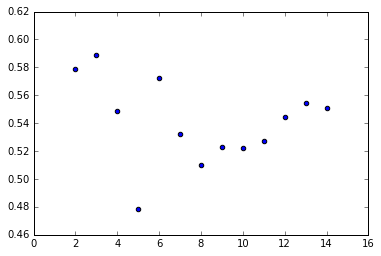

In [25]:
matplotlib.pyplot.scatter(s.keys(), s.values())

In [26]:
#This does not make sense at all because this is Time series dataset

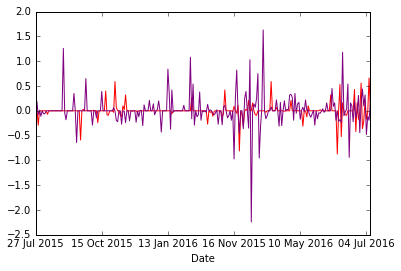

In [69]:
(filled_zcnh.Close - filled_zcnh.Close.shift(1)).plot(c='red')
(filled_zgol.Close - filled_zgol.Close.shift(1)).plot(c='purple')

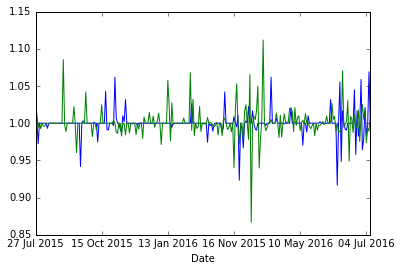

In [68]:
(filled_zcnh.Close / filled_zcnh.Close.shift(1)).plot(c='blue')
(filled_zgol.Close / filled_zgol.Close.shift(1)).plot(c='green')

In [76]:
import statsmodels.api

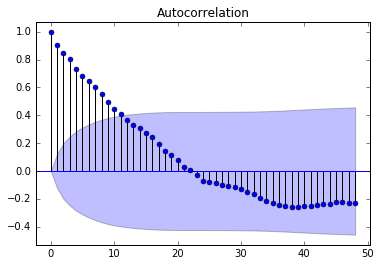

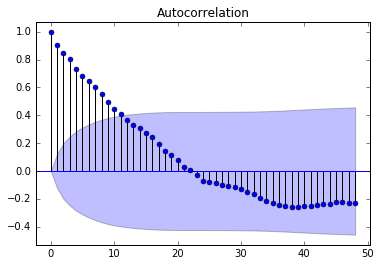

In [77]:
statsmodels.api.graphics.tsa.plot_acf(filled_zcnh.Close, lags=48)

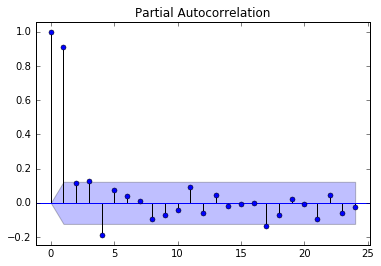

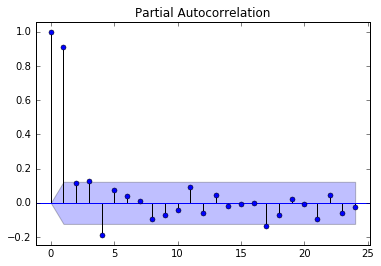

In [78]:
statsmodels.api.graphics.tsa.plot_pacf(filled_zcnh.Close, lags=24)

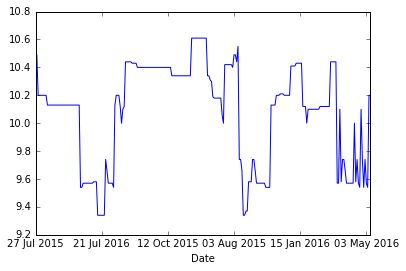

In [99]:
new_zcnh = pandas.read_csv('ZCNH.csv', na_values = '0')
new_zcnh.columns = ['Code','Date','Opening','High','Low','Close','Volume']
new_zcnh = zcnh.fillna(method='pad')
new_zcnh.Close.plot()

In [104]:
new_zcnh.reset_index(inplace=True)
new_zcnh['Date'] = pandas.to_datetime(new_zcnh['Date'])
new_zcnh = new_zcnh.set_index('Date')

In [139]:
# problem here!!!!
statsmodels.api.graphics.tsa.month_plot(new_zcnh.Close)

AttributeError: 'NoneType' object has no attribute 'startswith'

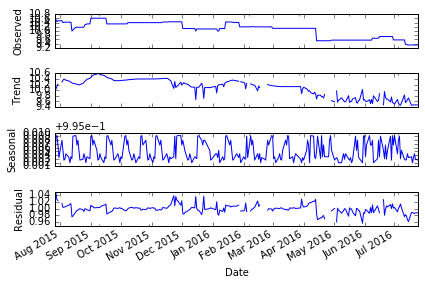

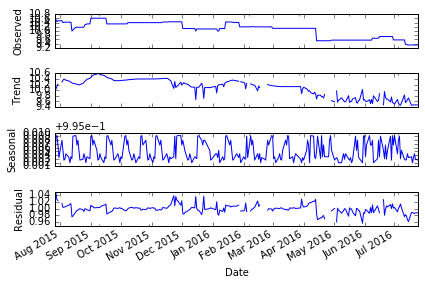

In [125]:
dcr = statsmodels.api.tsa.seasonal_decompose(new_zcnh.Close, model = 'multiplicative', freq = 12)
dcr.plot()

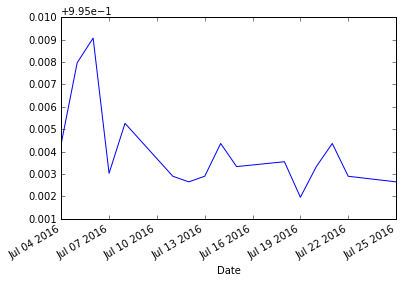

In [126]:
dcr.seasonal[dcr.seasonal.index > '2016-07-01'].plot()

In [127]:
detrend = statsmodels.api.tsa.detrend(new_zcnh.Close)

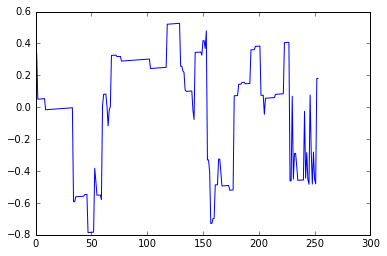

In [128]:
matplotlib.pyplot.plot(detrend)

In [129]:
trend = new_zcnh.Close - detrend

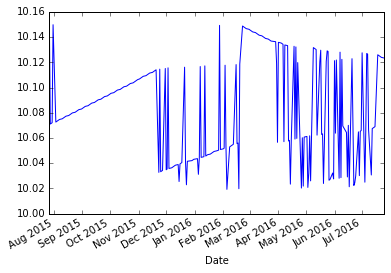

In [130]:
trend.plot()

In [124]:
#this also doesn't look too good

In [131]:
monthly_trends = []
for i in range(12):
    monthly_trends.append(detrend[i::12].mean())

In [132]:
monthly_trends = [detrend[i::12].mean() for i in range(12)]

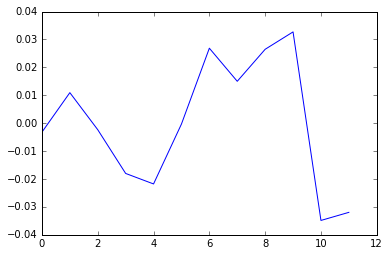

In [133]:
matplotlib.pyplot.plot(monthly_trends)

In [134]:
deseasoned = detrend - (monthly_trends * 50)[:len(detrend)]

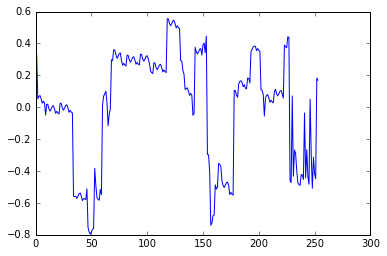

In [135]:
matplotlib.pyplot.plot(deseasoned)

In [136]:
arima = statsmodels.api.tsa.ARIMA(deseasoned, (12,0,3))

In [140]:
# another problem here!!!!
arw = arima.fit()

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [ ]:
#will continue to work on final with stock data